In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
pip install tensorflow==2.15.0

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
import tensorflow as tf

# Replace this path with the correct path to your model in Google Drive
model_path = '/content/drive/MyDrive/ENB0.h5'
model = tf.keras.models.load_model(model_path)


In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image generator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Path to your dataset folder
dataset_path = '/content/drive/MyDrive/PharmaScope'

# Print all class names (folders) before starting
class_names = os.listdir(dataset_path)
print("Class Names (Folders):", class_names)

# Set up the generator to load images from your dataset folder
test_generator = datagen.flow_from_directory(
    dataset_path,                  # Path to your dataset
    target_size=(224, 224),         # Adjust to the input size of your model
    batch_size=60,                  # Load 60 images at a time
    class_mode='categorical',       # Multi-class classification
    shuffle=True                    # Shuffle the images
)


Class Names (Folders): ['Vitamin b-complex', 'Paracetamol', 'Salhale dry powder capsule', 'Not Medicine', 'Propranolol', 'Vitamin C', 'Salbutamol', 'Nifitepin', 'Omeprazole', 'Piriton', 'Dexamethasone', 'Metformin', 'Folic acid', 'Domperidone', 'Flutihale dry powder capsule', 'Diclofenac', 'Iprahale dry powder capsule', 'gastro resistant tablets', 'Famotidine', 'Losatan', 'Cetirizine', 'Albendazole', 'Bisacodyl', 'Cephalexin', 'Beclovent dry powder capsule', 'Cypro', 'Amoxicillin']
Found 3495 images belonging to 27 classes.


In [16]:
# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/ENB0.h5')


In [22]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the model (adjust the path as necessary)
model = tf.keras.models.load_model('/content/drive/MyDrive/ENB0.h5')

# Define the class names
class_names = [
    "Albendazole", "Amoxicillin", "Beclovent dry powder capsule", "Bisacodyl",
    "Cephalexin", "Cetirizine", "Cypro", "Dexamethasone", "Diclofenac",
    "Domperidone", "Famotidine", "Flutihale dry powder capsule", "Folic acid",
    "Iprahale dry powder capsule", "Losartan", "Metformin", "Nifitepin",
    "Not Medicine", "Omeprazole", "Paracetamol", "Piriton", "Propranolol",
    "Salbutamol", "Salhale dry powder capsule", "Vitamin C", "Vitamin B-complex",
    "gastro-resistant tablets"
]

# Define the path to your dataset
dataset_path = '/content/drive/MyDrive/PharmaScope'  # Change this to your dataset path

# Load the image files
image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Check the total number of images in the dataset
total_images = len(image_files)
print(f"Total number of images in dataset: {total_images}")

# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size as per your model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize if your model was trained on normalized images
    return img_array[0]  # Return the single image array

# Select a random sample of images, ensuring not to exceed the total available images
num_images = min(9, total_images)  # Number of images to display
random_images = random.sample(image_files, num_images)

plt.figure(figsize=(15, 15))

for i, image_path in enumerate(random_images):
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)
    img_batch = np.expand_dims(image, axis=0)

    # Make a prediction
    predictions = model.predict(img_batch)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100  # Convert to percentage

    # Get the actual class name from the filename or define a way to obtain it
    actual_class = os.path.basename(image_path).split('_')[0]  # Assuming the filename contains the class name

    # Display the image and prediction results
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis("off")

plt.tight_layout()
plt.show()


Total number of images in dataset: 0


<Figure size 1500x1500 with 0 Axes>

Dataset path: /content/drive/MyDrive/PharmaScope
Total number of images in dataset: 3495
Images found: ['/content/drive/MyDrive/PharmaScope/Vitamin b-complex/B_002.jpg', '/content/drive/MyDrive/PharmaScope/Vitamin b-complex/B_004.jpg', '/content/drive/MyDrive/PharmaScope/Vitamin b-complex/B_000.jpg', '/content/drive/MyDrive/PharmaScope/Vitamin b-complex/B_001.jpg', '/content/drive/MyDrive/PharmaScope/Vitamin b-complex/B_003.jpg', '/content/drive/MyDrive/PharmaScope/Vitamin b-complex/B_005.jpg', '/content/drive/MyDrive/PharmaScope/Vitamin b-complex/B_008.jpg', '/content/drive/MyDrive/PharmaScope/Vitamin b-complex/B_007.jpg', '/content/drive/MyDrive/PharmaScope/Vitamin b-complex/B_006.jpg', '/content/drive/MyDrive/PharmaScope/Vitamin b-complex/B_009.jpg', '/content/drive/MyDrive/PharmaScope/Vitamin b-complex/B_013.jpg', '/content/drive/MyDrive/PharmaScope/Vitamin b-complex/B_011.jpg', '/content/drive/MyDrive/PharmaScope/Vitamin b-complex/B_010.jpg', '/content/drive/MyDrive/PharmaScope/Vi

AttributeError: 'numpy.ndarray' object has no attribute 'load_img'

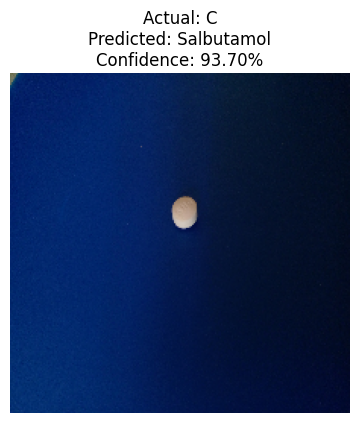

In [23]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the model (adjust the path as necessary)
model = tf.keras.models.load_model('/content/drive/MyDrive/ENB0.h5')

# Define the class names
class_names = [
    "Albendazole", "Amoxicillin", "Beclovent dry powder capsule", "Bisacodyl",
    "Cephalexin", "Cetirizine", "Cypro", "Dexamethasone", "Diclofenac",
    "Domperidone", "Famotidine", "Flutihale dry powder capsule", "Folic acid",
    "Iprahale dry powder capsule", "Losartan", "Metformin", "Nifitepin",
    "Not Medicine", "Omeprazole", "Paracetamol", "Piriton", "Propranolol",
    "Salbutamol", "Salhale dry powder capsule", "Vitamin C", "Vitamin B-complex",
    "gastro-resistant tablets"
]

# Define the path to your dataset
dataset_path = '/content/drive/MyDrive/PharmaScope'  # Change this to your dataset path

# Check the dataset path
print(f"Dataset path: {dataset_path}")

# Load the image files from subdirectories
image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(root, file))

# Check the total number of images in the dataset
total_images = len(image_files)
print(f"Total number of images in dataset: {total_images}")
print("Images found:", image_files)  # List of found images

# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size as per your model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize if your model was trained on normalized images
    return img_array[0]  # Return the single image array

# Select a random sample of images, ensuring not to exceed the total available images
num_images = min(9, total_images)  # Number of images to display
if total_images > 0:
    random_images = random.sample(image_files, num_images)

    plt.figure(figsize=(15, 15))

    for i, image_path in enumerate(random_images):
        # Load and preprocess the image
        image = load_and_preprocess_image(image_path)
        img_batch = np.expand_dims(image, axis=0)

        # Make a prediction
        predictions = model.predict(img_batch)
        predicted_class = class_names[np.argmax(predictions)]
        confidence = np.max(predictions) * 100  # Convert to percentage

        # Get the actual class name from the filename or define a way to obtain it
        actual_class = os.path.basename(image_path).split('_')[0]  # Assuming the filename contains the class name

        # Display the image and prediction results
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
        plt.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("No images found in the dataset to display.")
